In [32]:
import pandas as pd

In [33]:
dataset=pd.read_csv("Social_Network_Ads.csv")

In [34]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [35]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [36]:
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,True
2,15668575,26,43000,0,False
3,15603246,27,57000,0,False
4,15804002,19,76000,0,True
...,...,...,...,...,...
395,15691863,46,41000,1,False
396,15706071,51,23000,1,True
397,15654296,50,20000,1,False
398,15755018,36,33000,0,True


In [37]:
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,True
2,15668575,26,43000,0,False
3,15603246,27,57000,0,False
4,15804002,19,76000,0,True
...,...,...,...,...,...
395,15691863,46,41000,1,False
396,15706071,51,23000,1,True
397,15654296,50,20000,1,False
398,15755018,36,33000,0,True


In [38]:
dataset["Purchased"].value_counts()
#balanced or imbalanced we can see


Purchased
0    257
1    143
Name: count, dtype: int64

In [39]:
indep=dataset[["Age","EstimatedSalary","Gender_Male"]]
dep=dataset["Purchased"]

In [40]:
indep.shape #400 rows , 3 input data

(400, 3)

In [41]:
dep #output values

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [42]:
#split into training set and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size = 1/3, random_state = 0)

In [43]:
#ramdom forest classifier algorithm
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
        

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [44]:
y_pred = classifier.predict(X_test)
        

In [45]:
#confusion-matrix
from sklearn.metrics import confusion_matrix
confusion_value = confusion_matrix(y_test, y_pred)
        

In [46]:
print(confusion_value)

[[78  7]
 [ 6 43]]


In [47]:
#78-> 43 (Positive) , 6->7 (Negative)

In [48]:
#Evaluation metries for Classification use precision, recall,f1score,macro average and weighted average
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, y_pred)

In [49]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        85
           1       0.86      0.88      0.87        49

    accuracy                           0.90       134
   macro avg       0.89      0.90      0.90       134
weighted avg       0.90      0.90      0.90       134



In [1]:
#class 0

#0       0.93      0.92      0.92        85

# Precision (0.93): Out of all samples the model predicted 93%.
# Recall (0.92): Out of all actual 92% were correctly predicted.
# F1-score (0.92): The balanced average of precision
# Support (85): 85 actual samples in the test set.

In [51]:
#class 1

# 1       0.86      0.88      0.87        49

# Precision (0.86): Out of all predictions 86% were correct.
# Recall (0.88): Out of all actual 88% were predicted correctly.
# F1-score (0.87): The balanced of precision.
# Support (49): e 49 actual samples in the test set

In [52]:
# Accuracy (0.90): 90% of all samples correctly.
# Support (134): Total number of samples in the test set (85 + 49 = 134)

In [53]:
# Macro Precision (0.89): Average precision of class 0 and class 1, without considering imbalance.(0.93+0.86)/2=0.895
# Macro Recall (0.90): Average recall
# Macro F1-score (0.90): Average F1-score

In [54]:
# Weighted Precision (0.90):
# Weighted Recall (0.90): 
# Weighted F1-score (0.90): More reliable if classes are imbalanced

In [55]:
print(confusion_value)

[[78  7]
 [ 6 43]]


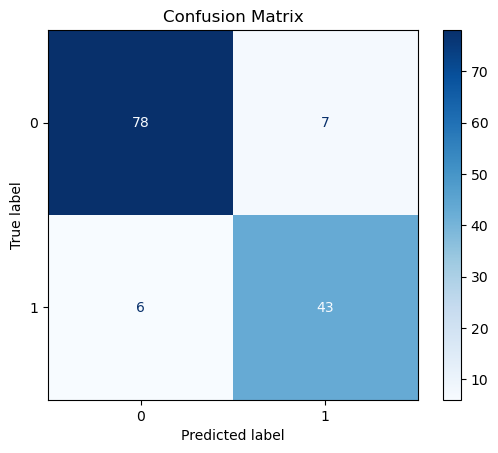

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get confusion matrix
confusion_value = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_value)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [57]:
age_input=float(input("Age:"))
salary_input=float(input("Salary:"))
sex_male_input=int(input("Sex Male 0 or 1:"))

Age: 23
Salary: 60000
Sex Male 0 or 1: 1


In [58]:
new_prediction = classifier.predict([[age_input, salary_input, sex_male_input]])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [59]:
# Show the prediction
print("\nPrediction for new input:")
print(f"Input: Age={age_input}, Salary={salary_input}, Sex_Male={sex_male_input}")
print(f"Predicted Class: {new_prediction[0]}")


Prediction for new input:
Input: Age=23.0, Salary=60000.0, Sex_Male=1
Predicted Class: 0


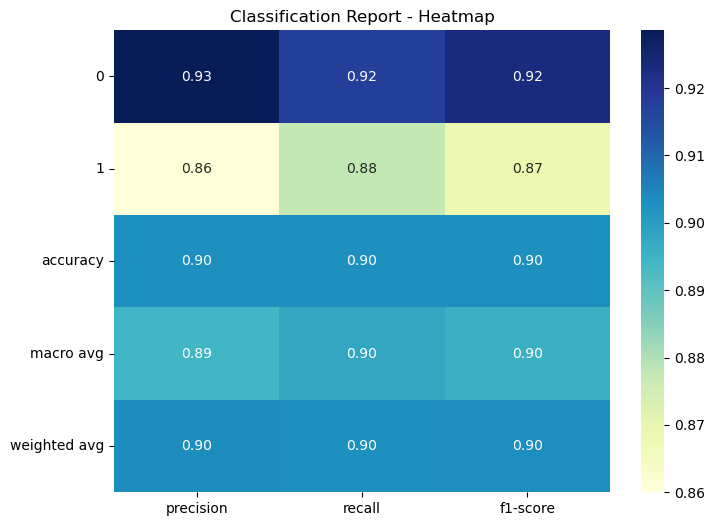

In [60]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Generate the classification report
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
df_report = pd.DataFrame(report_dict).transpose()

# Optional: Drop support column if you only want precision, recall, f1-score
df_metrics = df_report.drop(columns=['support'])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_metrics, annot=True, cmap="YlGnBu", fmt=".2f")

plt.title("Classification Report - Heatmap")
plt.yticks(rotation=0)
plt.show()
